# Modelo Random Forest

**Autor:** Pablo Spínola López

**Descripción:** Este notebook realiza el desarrollo, entrenamiento y evaluación del modelo Random Forest utilizando distintas técnicas como el ajuste de hiperparámetros con GridSearchCV, validación cruzada estratificada (Stratified K-Fold), y análisis comparativo mediante métricas como AUC, TPR, FPR y curvas ROC.

Importación de todas las librerías necesarias para el entrenamiento

In [1]:
# Acceso a archivos
import sys
import os

# Visualización de métricas
import matplotlib.pyplot as plt

# Librería que divide en test y train el dataset, permite usar un stratified K-Fold, con la finalidad de revisar hiperparámetros
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
# Importación de el modelo a entrenar: Random Forest
from sklearn.ensemble import RandomForestClassifier

Importamos las funciones centralizadas

In [2]:
sys.path.append(os.path.abspath("../funciones"))

from funcionesEntrenamiento import (
    cargar_datos_entrenamiento,
    cargar_datos_prueba,
    imprimir_forma,
    division_train_val,
    reporte_clasificacion,
    crear_matriz_confusion,
    calcular_roc_auc,
    metricas_tpr_fpr,
    hacer_pepinillo
)

Cargamos Dataset, separando las etiquetas de los atributos

In [3]:
X, y = cargar_datos_entrenamiento()

shape, head = imprimir_forma(X)
print("Shape: ", shape)
head

Shape:  (1500, 1568)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_1490,tfidf_1491,tfidf_1492,tfidf_1493,tfidf_1494,tfidf_1495,tfidf_1496,tfidf_1497,tfidf_1498,tfidf_1499
0,0.238798,-0.062255,0,0,0,0,0,1.168716,0.355986,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.536538,-1.607600,0,0,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.453282,-0.283019,3,2,0,0,0,0.789926,0.952018,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.329069,0.158508,0,0,0,1,0,1.774781,0.654002,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.784277,-0.724546,0,0,0,1,0,-1.331300,0.952018,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


División de dataset en dimensión de entrenamiento y validación; 80% y 20%, respectivamente, de manera estratificada, manteniendo la relación razón en el preprocesamiento.

In [4]:
X_train, X_val, y_train, y_val = division_train_val(X, y)

train_shape, _ = imprimir_forma(X_train)
val_shape, _ = imprimir_forma(X_val)
print(f"Forma de conjunto de entrenamiento:", train_shape)
print(f"Forma de conjunto de validación:", val_shape)

Forma de conjunto de entrenamiento: (1200, 1568)
Forma de conjunto de validación: (300, 1568)


## Entrenamiento inicial de Random Forest

In [5]:
# Entrenamiento del modelo con parámetros default (random_state=22 se usa para )
rf_inicial = RandomForestClassifier(random_state=22)

scores = cross_val_score(rf_inicial, X_train, y_train, cv=5, scoring='roc_auc')

print("Resultados por fold:", scores)
print("Precisión promedio:", scores.mean())

Resultados por fold: [0.90411342 0.91238913 0.89946924 0.90004185 0.94318499]
Precisión promedio: 0.9118397254514171


In [6]:
rf_inicial.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

In [7]:
# Validación de modelo inicial y cálculo de métricas de evaluación
y_pred_inicial, y_proba_inicial, reporte_inicial = reporte_clasificacion(X_val, y_val, rf_inicial)

print("Classification Report:")
print(reporte_inicial)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       139
           1       0.84      0.91      0.87       161

    accuracy                           0.86       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300



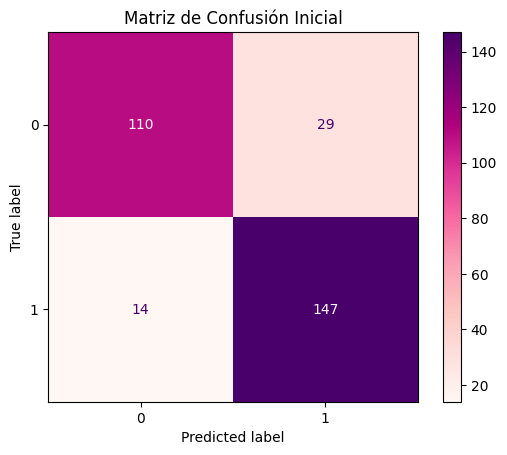

In [8]:
# Gráfica de matríz de confusión
cm_inicial, disp_inicial = crear_matriz_confusion(y_val, y_pred_inicial)
disp_inicial.plot(cmap='RdPu')
plt.title("Matriz de Confusión Inicial")
plt.show()

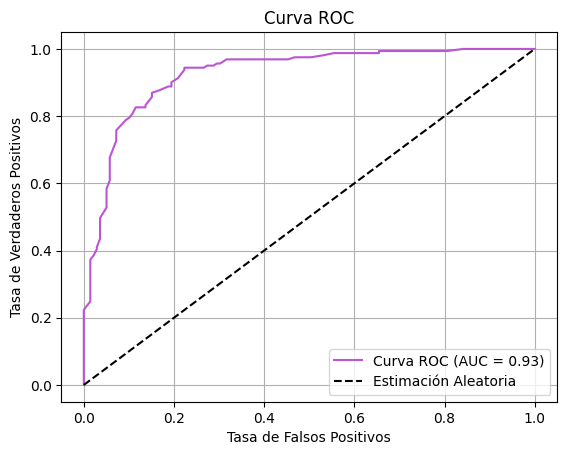

In [9]:
# Predicciones de probabilidad (para curva ROC)
fpr_inicial, tpr_inicial, thresholds_inicial, auc_score_inicial = calcular_roc_auc(y_val, y_proba_inicial)

# Gráfica de ROC
plt.figure()
plt.plot(fpr_inicial, tpr_inicial, color='mediumorchid', label=f"Curva ROC (AUC = {auc_score_inicial:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [10]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_inicial, FPR_inicial = metricas_tpr_fpr(cm_inicial)

# Mostrar métricas
print(f"AUC: {(auc_score_inicial * 100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR_inicial * 100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR_inicial * 100):.4f}")

AUC: 92.5600
TPR (Tasa de Positivos Verdaderos): 91.3043
FPR (Tasa de Falsos Positivos): 20.8633


## Búsqueda de mejores parámetros (Entrenamiento y Validación)

In [17]:
# Modelo base para encontrar mejores parámetros
rf = RandomForestClassifier(random_state=22)

# Parámetros a buscar con GridSearchSV  
param_grid = {
    'n_estimators': [300, 400, 500, 600],
    'max_depth': [None, 1, 2, 3, 5],
    'min_samples_split': [6, 7, 8, 9],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Cross-validation estratificada
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=22
)

# GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

In [18]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             error_score='raise',
             estimator=RandomForestClassifier(random_state=22), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [6, 7],
                         'n_estimators': [300, 400]},
             scoring='roc_auc', verbose=1)

In [21]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 400}

In [22]:
# Creación de modelo con los mejores parámetros
best_randomforest = RandomForestClassifier(
    n_estimators = 400,
    criterion = 'entropy',
    max_depth = None,
    max_features = 'log2',
    min_samples_leaf = 1,
    min_samples_split = 7,
    random_state = 22
)

best_randomforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=7, n_estimators=400, random_state=22)

In [23]:
# Validación del modelo
y_pred, y_proba, reporte = reporte_clasificacion(X_val, y_val, best_randomforest)

print("Classification Report:")
print(reporte)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       139
           1       0.84      0.93      0.88       161

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



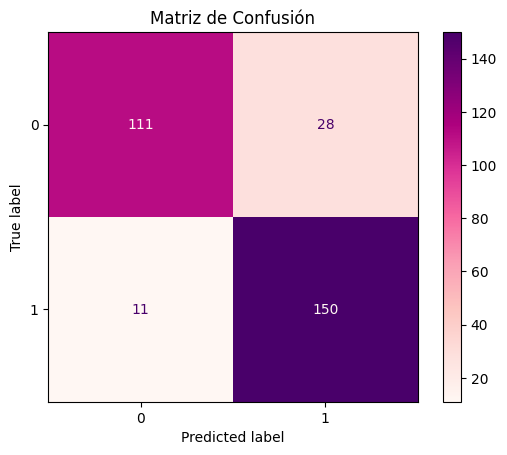

In [24]:
# Matriz de confusión
cm, disp = crear_matriz_confusion(y_val, y_pred)
disp.plot(cmap='RdPu')
plt.title("Matriz de Confusión")
plt.show()

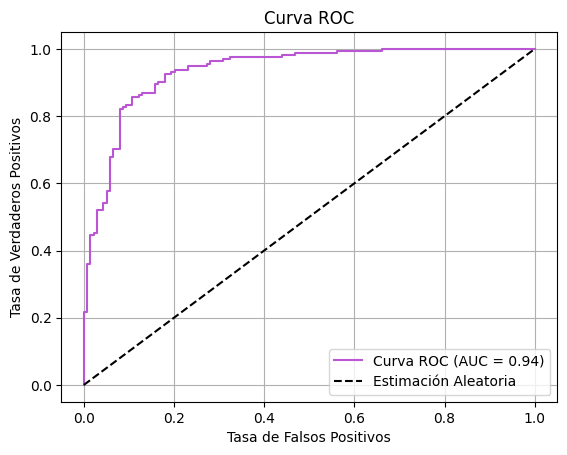

In [25]:
# Predicciones de probabilidad (para curva ROC)
fpr, tpr, thresholds, auc_score = calcular_roc_auc(y_val, y_proba)

# Gráfica de ROC
plt.figure()
plt.plot(fpr, tpr, color='mediumorchid', label=f"Curva ROC (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [26]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR, FPR = metricas_tpr_fpr(cm)

# Mostrar métricas
print(f"AUC: {(auc_score * 100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR * 100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR * 100):.4f}")

AUC: 93.5565
TPR (Tasa de Positivos Verdaderos): 93.1677
FPR (Tasa de Falsos Positivos): 20.1439


## Modelo Final (Entrenamiento y Prueba)

In [28]:
# Modelo entrenado con todos los datos de ds_tradicional
modelRF = RandomForestClassifier(
    n_estimators = 400,
    criterion = 'entropy',
    max_depth = None,
    max_features = 'log2',
    min_samples_leaf = 1,
    min_samples_split = 7,
    random_state = 22
)

modelRF.fit(X, y)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=7, n_estimators=400, random_state=22)

In [29]:
# Cargar datos y separar características y columna con las clases con función 
X_test, y_test = cargar_datos_prueba()

shape_test, head_test = imprimir_forma(X_test)
print("Shape test: ", shape_test)
head_test

Shape test:  (250, 1568)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_1490,tfidf_1491,tfidf_1492,tfidf_1493,tfidf_1494,tfidf_1495,tfidf_1496,tfidf_1497,tfidf_1498,tfidf_1499
0,-0.393101,-0.503783,0,1,0,0,0,0.966695,1.349373,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.315037,2.366144,0,1,0,1,1,-0.194929,0.542246,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.874548,-0.724546,2,2,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.178617,-0.283019,1,3,0,1,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.315037,3.249199,1,3,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Prueba del modelo final
y_pred_test, y_proba_test, reporte_test = reporte_clasificacion(X_test, y_test, modelRF)

print("Classification Report:")
print(reporte_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.81       116
           1       0.80      0.93      0.86       134

    accuracy                           0.84       250
   macro avg       0.85      0.83      0.83       250
weighted avg       0.84      0.84      0.83       250



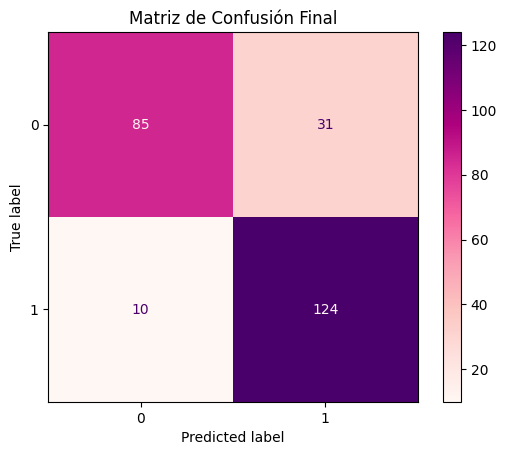

In [31]:
# Matriz de confusión
cm_test, disp_test = crear_matriz_confusion(y_test, y_pred_test)
disp_test.plot(cmap='RdPu')
plt.title("Matriz de Confusión Final")
plt.show()

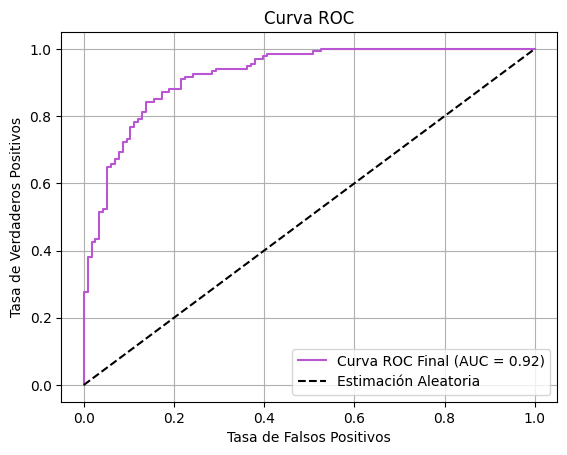

In [32]:
# Predicciones de probabilidad (para curva ROC)
fpr_test, tpr_test, thresholds_test, auc_score_test = calcular_roc_auc(y_test, y_proba_test)

# Gráfica ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='mediumorchid', label=f"Curva ROC Final (AUC = {auc_score_test:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [33]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_test, FPR_test = metricas_tpr_fpr(cm_test)

# Mostrar métricas
print(f"AUC: {(auc_score_test * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_test * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_test * 100):.4f}")

AUC: 92.2993
TPR (True Positive Rate): 92.5373
FPR (False Positive Rate): 26.7241


In [34]:
# Guardado del modelo final en un archivo pickle
hacer_pepinillo(modelRF, "modelRF.pkl")